In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
df = pd.read_csv('Advertising.csv')
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [2]:
df.drop('Unnamed: 0',axis =1,inplace = True)
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


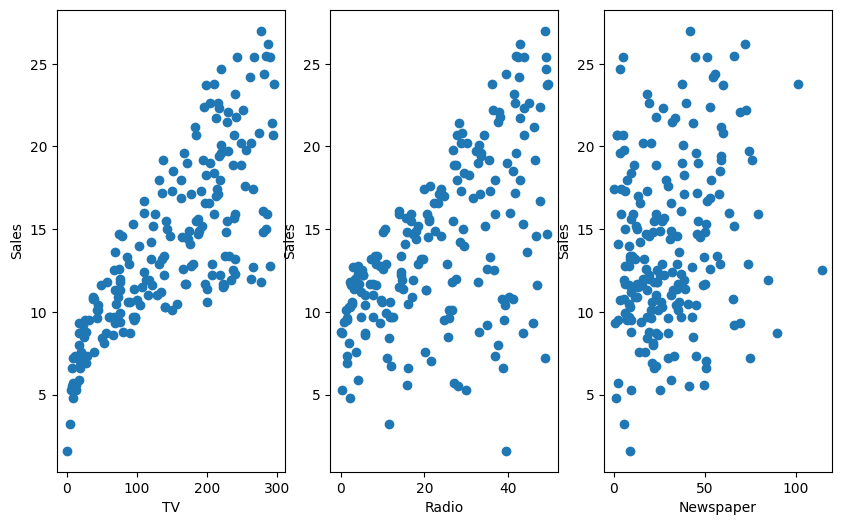

In [3]:
fig,ax = plt.subplots(1,3,figsize =(10,6))
for idx,columns in enumerate(['TV', 'Radio','Newspaper']):
    ax[idx].scatter(df[columns],df['Sales'])
    ax[idx].set_xlabel(columns)
    ax[idx].set_ylabel('Sales')

In [4]:
X = df.iloc[:,:3]
y = df.iloc[:,-1]
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [5]:
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.2)

In [6]:
print(X_train.shape)
print(y_train.shape)

(160, 3)
(160,)


In [7]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [8]:
model.coef_

array([0.04579011, 0.18474731, 0.00211728])

In [9]:
model.intercept_

2.8788553432794934

In [10]:
print(X_test.iloc[0,:])
print(y_test.iloc[0,])

TV           56.2
Radio         5.7
Newspaper    29.7
Name: 182, dtype: float64
8.7


In [11]:
total_error = 0
for a in range(len(y_test)):
    sum = 0
    for i, j in zip(X_test.iloc[0,:],model.coef_):
        sum = sum+ i * j
        pred = sum + 10
        error = (pred - y_test.iloc[a])**2
        total_error += error
print(total_error)
print(sum + model.intercept_)
print(y_test.iloc[0])

3691.187293406119
6.568202248571937
8.7


In [12]:
y_pred = model.predict(X_test)

In [13]:
from sklearn.metrics import r2_score
score = r2_score(y_pred,y_test)
print(score)

0.9073594034490318
